<a href="https://colab.research.google.com/github/ReanSchwarzer1/Asia-Uni-Final-Project-covid-19/blob/main/x_ray_covid19_au_ai_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 Prediction Project

> Dataset: https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

### *By Adhiraj Bhagawati (P20028)*

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Libraries

In [ ]:
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [ ]:

train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '../input/covid19-radiography-database/COVID-19 Radiography Database',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../input/covid19-radiography-database/COVID-19 Radiography Database',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 3886 files belonging to 3 classes.
Using 3109 files for training.
Found 3886 files belonging to 3 classes.
Using 777 files for validation.


### Printing Class Names

In [ ]:
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]
for i in range(len(class_names)):
    print(class_names[i] ," " , i)

COVID-19   0
NORMAL   1
Viral Pneumonia   2


### Visualizing the data

Viral Pneumonia


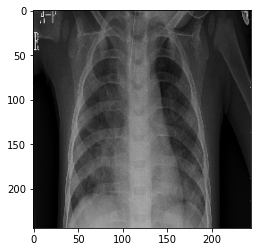

In [ ]:
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (500).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("Viral Pneumonia")
plt.imshow(new_img)

NORMAL


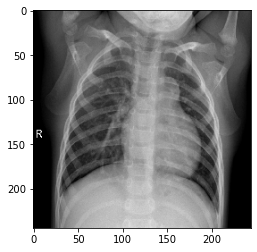

In [ ]:
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1013).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("NORMAL")
plt.imshow(new_img)

COVID-19


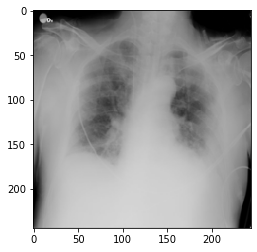

In [ ]:
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (1).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("COVID-19")
plt.imshow(new_img)

### EDA

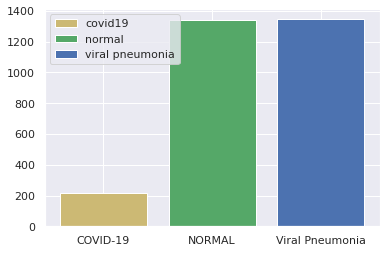

In [ ]:
fig, ax = plt.subplots()
ax.bar("COVID-19",219,color="y",label="covid19")
ax.bar("NORMAL",1341,color="g",label="normal")
ax.bar("Viral Pneumonia",1345,color="b",label="viral pneumonia")
ax.legend()
sns.set()

### Building the model

In [ ]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(3, activation= 'softmax')
])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
pred = model.fit(train_data,validation_data= test_data,batch_size=32,epochs = 5,callbacks=[early])

Epoch 1/5
98/98 [==============================] - 97s 881ms/step - loss: 3.0490 - accuracy: 0.7258 - val_loss: 0.8398 - val_accuracy: 0.6538
Epoch 2/5
98/98 [==============================] - 47s 452ms/step - loss: 0.2318 - accuracy: 0.9238 - val_loss: 0.1547 - val_accuracy: 0.9356
Epoch 3/5
98/98 [==============================] - 47s 453ms/step - loss: 0.1802 - accuracy: 0.9454 - val_loss: 0.1909 - val_accuracy: 0.9254
Epoch 4/5
98/98 [==============================] - 47s 449ms/step - loss: 0.1414 - accuracy: 0.9508 - val_loss: 0.1385 - val_accuracy: 0.9524
Epoch 5/5
98/98 [==============================] - 47s 449ms/step - loss: 0.1096 - accuracy: 0.9633 - val_loss: 0.1452 - val_accuracy: 0.9537


In [ ]:
model.evaluate(test_data)

25/25 [==============================] - 9s 242ms/step - loss: 0.1452 - accuracy: 0.9537


[0.14524754881858826, 0.953667938709259]

### Training vs Validation accuracy

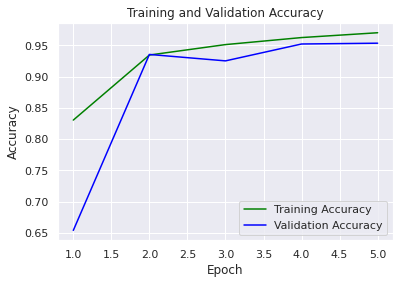

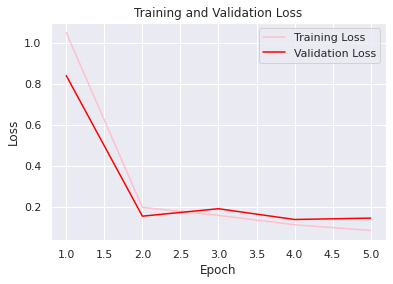

In [ ]:
sns.set()

acc = pred.history['accuracy']
val_acc = pred.history['val_accuracy']
loss = pred.history['loss']
val_loss = pred.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

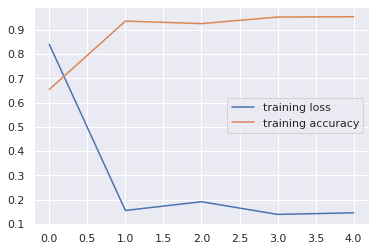

In [ ]:
#train data accuracy and loss
plt.plot(pred.history['val_loss'], label = 'training loss')
plt.plot(pred.history['val_accuracy'], label = 'training accuracy')
plt.legend()

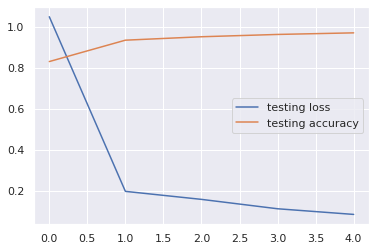

In [ ]:
#test data accuracy and loss
plt.plot(pred.history['loss'], label = 'testing loss')
plt.plot(pred.history['accuracy'], label = 'testing accuracy')
plt.legend()

In [ ]:
score = tf.nn.softmax(pred)

ValueError: Attempt to convert a value (<tensorflow.python.keras.callbacks.History object at 0x7f96a2c4be50>) with an unsupported type (<class 'tensorflow.python.keras.callbacks.History'>) to a Tensor.

### Testing the model

[0]
COVID-19


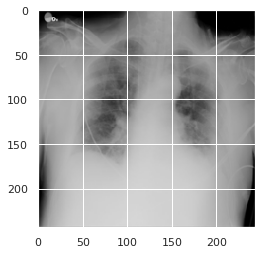

In [ ]:
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/COVID/COVID (1).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
NORMAL


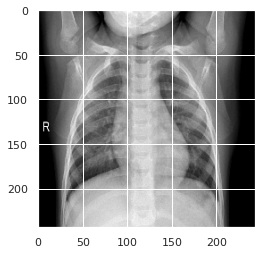

In [ ]:
#example 2
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1000).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
Viral Pneumonia


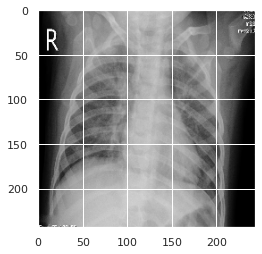

In [ ]:
#example 3
image_path = "../input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

model.save("model.h5")